### Seminar 1 - Chemical Reactor Analysis II

T.A. Maryam Azhin, 
Department of Chemical and Materials Engineering, University of Alberta

**Q1**. For an exothermic reversible reaction occurring in an adiabatic PFR, qualitatively sketch the trends of $X$ and $T$ with reactor volume $V$. On the plot of $X$ vs $V$, also indicate how the equilibrium conversion would vary with the reactor temperature. Finally, sketch how you would expect the $X$, $X_{eq}$ and $T$ to look if a well-designed heat exchange jacket with constant temperature of coolant was added to the system.

**Answer**


![PFR.png](PFR.png)

![Q1fig.png](Q1fig.png)

**Q2**. Consider a PFR with a volume of $50 dm^3$, used to conduct a liquid phase system of reactions. If $k_1=0.05 s^{-1}$ and $k_2=0.01 s^{-1}$, $C_{A0}= 1mol/dm^3$, and the volumetric flow rate is $50 dm^3/min$, find the outlet concentrations of A, D and U.

![1.png](1.png)

**Answer**.

In a liquid phase PFR. 
$\nu_0=50 \frac{dm^3}{min}=\frac{50}{60}\frac{dm^3}{s}$,  $C_{A0}= 1mol/dm^3$, $V=50 dm^3$
\begin{eqnarray}
\frac{dF_A}{dV}=r_A=-(k_1+k_2)C_A\\
\nu_0\frac{dC_A}{dV}=r_A=-(k_1+k_2)C_A\\
\int_{C_{A0}}^{C_{A}}\frac{dC_A}{C_A}=-\frac{(k_1+k_2)}{\nu_0}\int_{0}^{V}dV\\
C_{A}=C_{A0}exp(-(k_1+k_2)\frac{V}{\nu_0})\\
C_A=0.0273 mol/dm^3
\end{eqnarray}

Text(0, 0.5, 'Concentration, mol/dm^3')

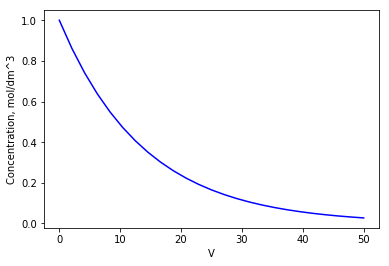

In [2]:
import numpy as np
from scipy.integrate import odeint

CA0=1 #mol/dm^3
V=50 #dm^3
k1=0.05
k2=0.01
    
V=np.linspace(0.,50.,25)
Ca=np.zeros(len(V))

def fun(Ca,V):
    k1=0.05
    k2=0.01
    v0=50./60. #\frac{dm^3}{s}
    dcdv=-(k1+k2)/v0*Ca
    return dcdv

init_ca=1.0

Ca=odeint(fun,init_ca,V)

import matplotlib.pyplot as plt
plt.plot(V, Ca, 'b-', label='Ca(t)')
plt.xlabel("V")
plt.ylabel("Concentration, mol/dm^3")


Both species $D$ and $U$ have the same type of rate equations.
\begin{eqnarray}
\frac{dF_D}{dV}=r_D=k_1C_A=k_1C_{A0}exp(-(k_1+k_2)\frac{V}{\nu_0})\\
\frac{dF_U}{dV}=r_U=k_1C_A=k_2C_{A0}exp(-(k_1+k_2)\frac{V}{\nu_0})\\
\frac{mole \;\;of\;\;D\;\;produced}{mole \;\;of\;\;U\;\;produced}=\frac{k_1}{k_2}=5
\end{eqnarray}
Also for every mole of $A$ consumed, 1 total mole of products are produced.
\begin{eqnarray}
C_D=(1-0.0273)\frac{5}{5+1}=0.8106\;\; \frac{mol}{dm^3}\\
C_U=(1-0.0273)\frac{1}{5+1}=0.1621\;\; \frac{mol}{dm^3}
\end{eqnarray}

In [5]:
k1/k2
Ca[24]

array([0.02732372])

In [6]:
CD=(1-Ca[len(Ca)-1])*k1/(k1+k2)

In [25]:
print("CD = ", CD)

CD =  [0.81056357]


In [26]:
CU=(1-Ca[len(Ca)-1])*k2/(k1+k2)

In [27]:
print("CU = ", CU)

CU =  [0.16211271]


**Q3**. A second order gas phase reaction is conducted in an adiabatic constant volume batch reactor.
$A+B\rightarrow C$, $-r_A=kC_AC_B$, $k=20 \frac{dm^3}{mol.s}$ at $400 K$. The initial reactor temperature is $400 K$, and the initial pressure is $100 kPa$. The volume of the reactor is $500\; dm^3$. The reactor is charged initially with $40 \% A$, $30 \% B$, and $30\%$ inerts. The constant volume heat capacity of the mixture remains constant at $50 J/mol/K$, and the heat of reaction is constant at $-10 kJ/mol$. If the activation energy of the reaction $Ea=0$, calculate the time to reach $50\%$ conversion, and the temperature and pressure at this conversion.

**Answer**.

|.| Initial   |Final|
|---|------|------|
|A   | $N_{A0}$|     $0.5 N_{A0}$|             
|B   | $0.75 N_{A0}$ | $0.75 N_{A0}-0.5 N_{A0} $|
|C   | 0         | $0.5 NA_0 $          |
|I   | $0.75 N_{A0}$ | $0.75 N_{A0} $         |
|---|------|------|
|Total | $2.5 N_{A0}$ | $2 N_{A0}$            |


Adiabatic operating line: 
\begin{eqnarray}
T=T_0+\frac{(-\Delta H_{rxn})X}{\sum \Theta_i Cp_i}\\
T=400+\frac{10,000}{50}X\;\;
at\;\; X=0.5\;\;\;\;T=500K
\end{eqnarray}


\begin{eqnarray}
N_{T,0}=\frac{P_0V}{RT}=\frac{100\;\; kPa*500 \;\;dm^3}{8.314 \;\;\frac{Pa.m^3}{mol.K}*400\;\;K}=15.03\;\; moles\\
\frac{N_T}{N_{T,0}}=\frac{2N_{A,0}}{2.5N_{A0}}=0.8\\
P=\frac{N_TRT}{V}=\frac{15.03*0.8*8.314*500}{500/1000}=10^5Pa=100 kPa
\end{eqnarray}
Mole balance: \
\begin{eqnarray}
N_{A,0}\frac{dX}{dt}=kC_AC_B\
C_{A0}V\frac{dX}{dt}=kC_{A0}^2(1-X)(\Theta_B-X)\\
\int_0^{X=0.5}\frac{dX}{(1-X)(\Theta_B-X)}=\frac{kC_{A0}}{V}\int_0^t=\frac{kC_{A0}t}{V}\\
\frac{kC_{A0}t}{V}=(\frac{ln(1-X)}{(1-\Theta_B)}-\frac{ln(\Theta_B-X)}{\Theta_B(1-\Theta_B)})_{0\rightarrow X=0.5}\\
C_{A0}=0.4C_{T0}=0.4\frac{N_{T0}}{V}=\frac{0.4*15.03}{500/1000}=3.37 \;\;s
\end{eqnarray}

In [34]:
import numpy as np

P0=100 #kPa
V=500 #dm^3
R=8.314 #Pa.m^3/(mol.K)
T0=400 #K
Hrx=10000
CP=50
x=0.5 #conversion

NT0=P0*V/(R*T0)

T=T0+Hrx*x/CP

In [35]:
NT0
T0

400

**Q4**. A liquid phase elementary reaction $2A\rightarrow B$ is carried out in a CSTR with pure $A$ in the feed. If the pre-exponential factor is $2*10^3$ L/mol/min, $Ea=40 kJ/mol$, $C_{A0}= 1 mol/L$, $F_{A0}=2 mol/min$, $C_P$ mix$=25 J/mol/K $(constant), $-\Delta H_{rxn}=20 kJ/mol$ (constant), and the feed temperature is $325 K$, find the CSTR volume required to achieve 10\% conversion in adiabatic operation. Also find the Damkohler number for this case.

**Answer**.

Adiabatic operating line, neglect $\Delta C_p$
\begin{eqnarray}
T=T_0+\frac{(-\Delta H_{rxn})X}{\sum \Theta_i C_{P1}}\\
T=325+\frac{20000X}{25}=325+800X\\
at\;\;X=0.1\;\;\;T=405\;K\;\;\;K(T)=2*10^3exp(\frac{-E_a}{RT})=1.386*10^{-2}\\
\end{eqnarray}
Molar Balance:\\
\begin{eqnarray}
V=\frac{f_{A0}X}{-r_A}=\frac{2*0.1}{(1.39*10^{-2})C_{A0}^2(1-X)^2}\\
V=\frac{2*0.1}{(1.39*10^{-2})(1-0.1)^2}=17.81 \;\;L
\end{eqnarray}
Damkohler Number:\\
\begin{eqnarray}
Da=kC_{A0}\tau= (1.39*10^{-2})*1*\frac{V}{\nu_0}=(1.39*10^{-2})*1*\frac{V}{F_{A0}/C_{A0}}\\
Da=\frac{(1.39*10^{-2})*1*17.81}{2/1}=0.12
\end{eqnarray}

**Q5**. A constant - pressure batch reactor was charges with an equimolar feed of $A$ and $B$. The reaction $A+2B\rightarrow C$ proceeds at $900 K$ and $2 atm$. The rate law is $-r_A=k_AC_AC_B$ with $k_A=0.3 L mol^{-1}min^{-1}$. What time is necessary to reach $0.005 M$ concentration of the product?

**Answer**. $B$ is the limiting reactant. Therefore, $\frac{1}{2}A+B\rightarrow \frac{1}{2}C$.


Stoichiometric Table 

|.| Initial   | Used| Final|
|----|---|---|---------|
|A | $N_{B0}$ | -0.5 $N_{B0} X_B$ | $N_{B0}(1-0.5X_B)$ |
|B | $N_{B0}$ | $-N_{B0} X_B  $   | $N_{B0}(1- X_B)$   |                          
|C | 0        | $0.5N_{B0}\;X_B$  | $0.5N_{B0}\;X_B$   |

\begin{eqnarray}
\epsilon_B=y_B.\delta_B=0.5 ( \frac{1}{2}-(1+\frac{1}{2}))=-0.5\\
V=V_0(1+\epsilon X_B)\frac{P_0}{P}\frac{T}{T_0}=V_0(1-0.5X_B)\\
C_A=\frac{N_A}{V}=\frac{N_{B0}(1-0.5X_B)}{V_0(1+\epsilon X_B)\frac{P_0}{P}\frac{T}{T_0}}=C_{B0}\frac{1-0.5X_B}{1-0.5X_B}\\
C_B=\frac{N_B}{V}=C_{B0}\frac{1-X_B}{1-0.5X_B}\\
C_C=\frac{N_C}{V}=0.5C_{B0}\frac{X_B}{1-0.5X_B}\\
P=P_0,\;\;T=T_0 \;\;\Rightarrow \;\;C_A=C_{B0}\frac{1-0.5X_B}{1-0.5X_B}=C_{B0} \\ \nonumber
C_{B0}=\frac{P_{B0}}{RT}=\frac{y_{B0}P_{0}}{RT}=\frac{0.5*2}{0.082*900}=0.01355\;\;M\\
C_c=0.005=0.5*0.01355*\frac{X_B}{1-0.5X_B}\;\;\Rightarrow\;\; X_B=0.539
\end{eqnarray}
Mole Balance:\\
\begin{eqnarray}
N_{B0}\frac{dX_B}{dt}=-r_B*V=k_BC_AC_BV=k_BC_{B0}^2\frac{1-X_B}{1-0.5X_B}V_0(1-0.5X_B)\\
\frac{dX_B}{dt}=\frac{C_{B0}^2}{C_{B0}}k_B(1-X_B)\\ \nonumber
\int_0^{X_{B}} \frac{dX_B}{1-X_B}=C_{B0}k_Bt\\ \nonumber
ln(\frac{1}{1-X_B})=ln(\frac{1}{1-0.539})=0.774\;\;and\;\; k_B=2k_A=0.6 \frac{L}{mol.min}\\\
\Rightarrow\;\; t=\frac{0.774}{0.01355*0.6}=95\;\;min \nonumber
\end{eqnarray}